In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from pandas import DataFrame
import seaborn as sns

In [2]:
data=pd.read_csv("F:/hearteas.csv",sep=",") #read data
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


Data description

age: The person's age in years

sex: The person's sex (1 = male, 0 = female)

cp: The chest pain type (1= typical angina, 2= atypical angina, 3= non-anginal pain, 4= asymptomatic)

trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)

chol: serum cholesterol in mg/dl

fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)

restecg: Resting electrocardiographic results (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite 

left ventricular hypertrophy by Estes' criteria)

thalach: The person's maximum heart rate achieved

exang: Exercise induced angina (1 = yes; 0 = no)

oldpeak: ST depression induced by exercise relative to rest

slope: The slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)

ca: The number of major vessels (0-3) colored by flourosopy

thal: A blood disorder called thalassemia (0 = normal; 1 = fixed defect; 2 = reversable defect)

target: The presence of the heart disease in the patient (0 = no, 1 = yes)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
age         1025 non-null int64
sex         1025 non-null int64
cp          1025 non-null int64
trestbps    1025 non-null int64
chol        1025 non-null int64
fbs         1025 non-null int64
restecg     1025 non-null int64
thalach     1025 non-null int64
exang       1025 non-null int64
oldpeak     1025 non-null float64
slope       1025 non-null int64
ca          1025 non-null int64
thal        1025 non-null int64
target      1025 non-null int64
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


# Pre-processing

# change variabel type

In [4]:
data['sex'] = data['sex'].astype('category')
data['cp'] = data['cp'].astype('category')
data['fbs'] = data['fbs'].astype('category')
data['restecg'] = data['restecg'].astype('category')
data['exang'] = data['exang'].astype('category')
data['slope'] = data['slope'].astype('category')
data['ca'] = data['ca'].astype('category')
data['thal'] = data['thal'].astype('category')
data['target'] = data['target'].astype('category')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
age         1025 non-null int64
sex         1025 non-null category
cp          1025 non-null category
trestbps    1025 non-null int64
chol        1025 non-null int64
fbs         1025 non-null category
restecg     1025 non-null category
thalach     1025 non-null int64
exang       1025 non-null category
oldpeak     1025 non-null float64
slope       1025 non-null category
ca          1025 non-null category
thal        1025 non-null category
target      1025 non-null category
dtypes: category(9), float64(1), int64(4)
memory usage: 50.3 KB


# Summary Statistics

In [6]:
data.describe()

,age,trestbps,chol,thalach,oldpeak
count,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000
mean,54.434146,131.611707,246.00000,149.114146,1.071512
std,9.072290,17.516718,51.59251,23.005724,1.175053
min,29.000000,94.000000,126.00000,71.000000,0.000000
25%,48.000000,120.000000,211.00000,132.000000,0.000000
50%,56.000000,130.000000,240.00000,152.000000,0.800000
75%,61.000000,140.000000,275.00000,166.000000,1.800000
max,77.000000,200.000000,564.00000,202.000000,6.200000


In [7]:
data.groupby("target")['age'].describe().reset_index()

,target,count,mean,std,min,25%,50%,75%,max
0,0,499.0,56.569138,7.908153,35.0,52.0,58.0,62.0,77.0
1,1,526.0,52.408745,9.631804,29.0,44.0,52.0,59.0,76.0


In [8]:
data.groupby("target")['trestbps'].describe().reset_index()

,target,count,mean,std,min,25%,50%,75%,max
0,0,499.0,134.106212,18.576736,100.0,120.0,130.0,144.0,200.0
1,1,526.0,129.245247,16.112188,94.0,120.0,130.0,140.0,180.0


In [9]:
data.groupby("target")['chol'].describe().reset_index()

,target,count,mean,std,min,25%,50%,75%,max
0,0,499.0,251.292585,49.558924,131.0,217.0,249.0,284.00,409.0
1,1,526.0,240.979087,53.010345,126.0,208.0,234.0,265.75,564.0


In [10]:
data.groupby("target")['thalach'].describe().reset_index()

,target,count,mean,std,min,25%,50%,75%,max
0,0,499.0,139.130261,22.565235,71.0,125.0,142.0,156.0,195.0
1,1,526.0,158.585551,19.096928,96.0,149.0,161.5,172.0,202.0


In [11]:
data.groupby("target")['oldpeak'].describe().reset_index()

,target,count,mean,std,min,25%,50%,75%,max
0,0,499.0,1.600200,1.290956,0.0,0.6,1.4,2.5,6.2
1,1,526.0,0.569962,0.771079,0.0,0.0,0.2,1.0,4.2


# Remove outlier

In [12]:
from scipy import stats #outlier
z=np.abs(stats.zscore(data._get_numeric_data()))
print(z)

[[0.26843658 0.37763552 0.65933209 0.82132052 0.06088839]
 [0.15815703 0.4791073  0.83386117 0.2559679  1.72713707]
 [1.71659547 0.76468824 1.39623266 1.04869198 1.30141672]
 ...
 [0.81983438 1.23437834 0.56237149 1.35311262 0.06088839]
 [0.4889957  1.23437834 0.15513696 0.42992256 0.91232909]
 [0.04787747 0.66321646 1.12474297 1.57055593 0.27968789]]


In [13]:
outlier=data[(z<3).all(axis=1)]
print(outlier.shape) #jumlah data tidak outlier

(994, 14)


In [14]:
data1 = data[(z < 3).all(axis=1)]
print(data1.shape)

(994, 14)


# Visualisasi data

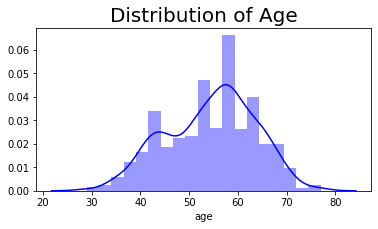

In [15]:
# checking the distribution of age amonng the patients

import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-dark-palette')
plt.rcParams['figure.figsize'] = (6, 3)
sns.distplot(data['age'], color = 'blue')
plt.title('Distribution of Age', fontsize = 20)
plt.show()

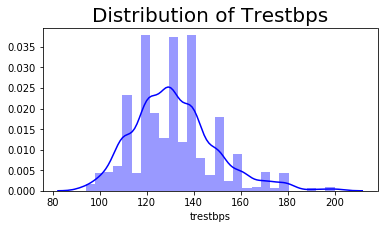

In [16]:
# checking the distribution of trestbps amonng the patients

import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-dark-palette')
plt.rcParams['figure.figsize'] = (6, 3)
sns.distplot(data['trestbps'], color = 'blue')
plt.title('Distribution of Trestbps', fontsize = 20)
plt.show()

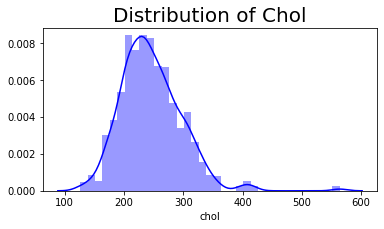

In [17]:
# checking the distribution of chol amonng the patients

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (6, 3)
sns.distplot(data['chol'], color = 'blue')
plt.title('Distribution of Chol', fontsize = 20)
plt.show()

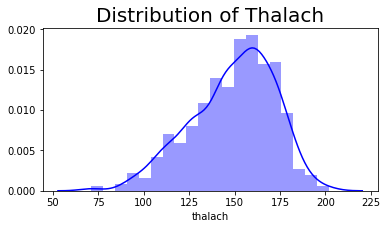

In [18]:
# checking the distribution of thalach amonng the patients

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (6, 3)
sns.distplot(data['thalach'], color = 'blue')
plt.title('Distribution of Thalach', fontsize = 20)
plt.show()

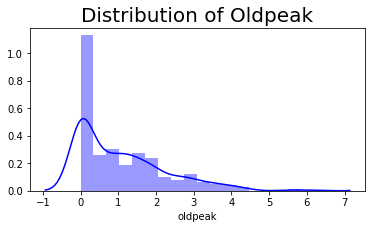

In [19]:
# checking the distribution of oldpeak amonng the patients

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (6, 3)
sns.distplot(data['oldpeak'], color = 'blue')
plt.title('Distribution of Oldpeak', fontsize = 20)
plt.show()

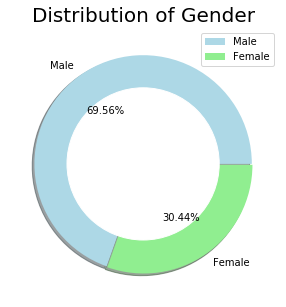

In [20]:
# plotting a donut chart for visualizing each of the recruitment channel's share

size = data['sex'].value_counts()
colors = ['lightblue', 'lightgreen']
labels = "Male", "Female"
explode = [0, 0.01]

my_circle = plt.Circle((0, 0), 0.7, color = 'white')

plt.rcParams['figure.figsize'] = (5, 5)
plt.pie(size, colors = colors, labels = labels, shadow = True, explode = explode, autopct = '%.2f%%')
plt.title('Distribution of Gender', fontsize = 20)
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.legend()
plt.show()

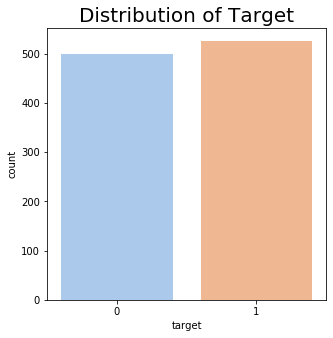

In [21]:
# plotting the target attribute

plt.rcParams['figure.figsize'] = (5, 5)
plt.style.use('seaborn-dark-palette')
sns.countplot(data['target'], palette = 'pastel')
plt.title('Distribution of Target', fontsize = 20)
plt.show()

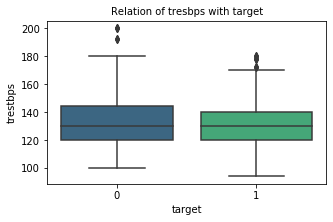

In [22]:
# tresbps vs target
plt.rcParams['figure.figsize'] = (5, 3)
sns.boxplot(data['target'], data['trestbps'], palette = 'viridis')
plt.title('Relation of tresbps with target', fontsize = 10)
plt.show()

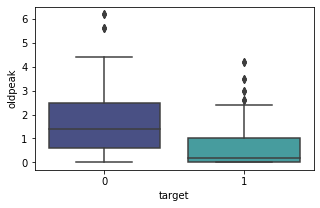

In [23]:
sns.boxplot(y="oldpeak",x='target',palette='mako',data=data)

target
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: age, dtype: object

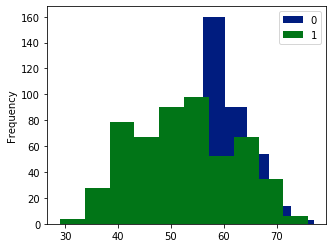

In [24]:
ageplot = data.groupby('target')['age']
ageplot.plot(kind='hist', figsize=[5,4],legend=True)

target
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: trestbps, dtype: object

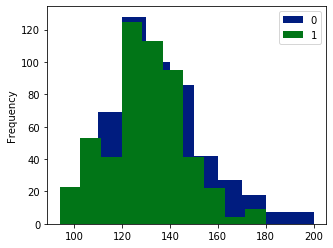

In [25]:
trestbpsplot = data.groupby('target')['trestbps']
trestbpsplot.plot(kind='hist', figsize=[5,4],legend=True)

target
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: chol, dtype: object

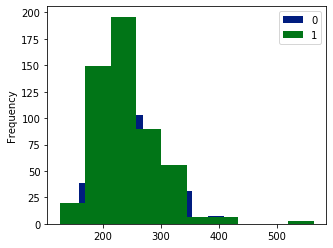

In [26]:
cholplot = data.groupby('target')['chol']
cholplot.plot(kind='hist', figsize=[5,4],legend=True)

target
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: oldpeak, dtype: object

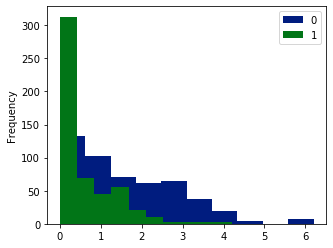

In [27]:
oldpeakplot = data.groupby('target')['oldpeak']
oldpeakplot.plot(kind='hist', figsize=[5,4],legend=True)

target
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: thalach, dtype: object

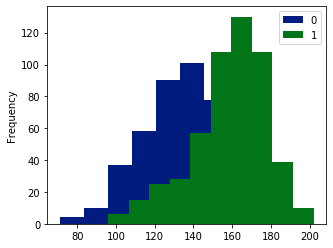

In [28]:
thalachplot = data.groupby('target')['thalach']
thalachplot.plot(kind='hist', figsize=[5,4],legend=True)

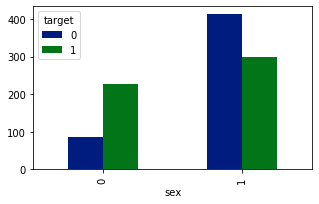

In [29]:
data.groupby(['sex','target']).size().unstack().plot(kind='bar',stacked=False)
plt.show()

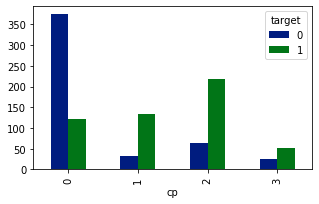

In [30]:
data.groupby(['cp','target']).size().unstack().plot(kind='bar',stacked=False)
plt.show()

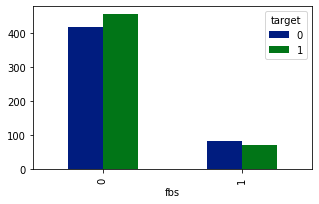

In [31]:
data.groupby(['fbs','target']).size().unstack().plot(kind='bar',stacked=False)
plt.show()

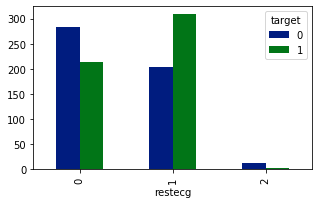

In [32]:
data.groupby(['restecg','target']).size().unstack().plot(kind='bar',stacked=False)
plt.show()

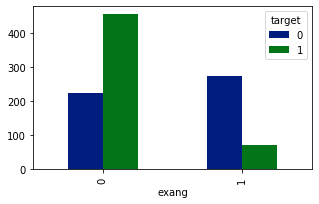

In [33]:
data.groupby(['exang','target']).size().unstack().plot(kind='bar',stacked=False)
plt.show()

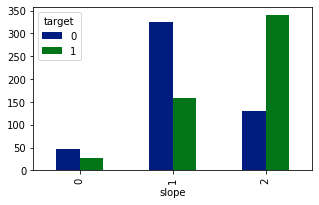

In [34]:
data.groupby(['slope','target']).size().unstack().plot(kind='bar',stacked=False)
plt.show()

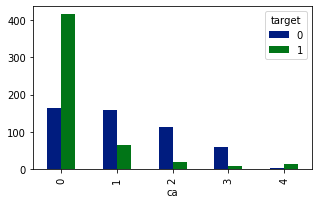

In [35]:
data.groupby(['ca','target']).size().unstack().plot(kind='bar',stacked=False)
plt.show()

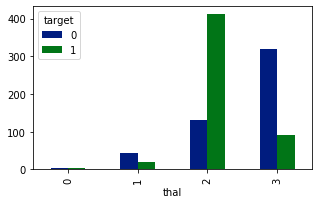

In [36]:
data.groupby(['thal','target']).size().unstack().plot(kind='bar',stacked=False)
plt.show()

# Feature selection

In [37]:
y_1=data['target']
x_1=data.drop(['target'], axis=1)

# Melihat multikolinearitas

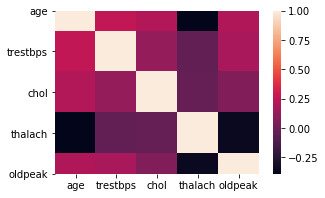

In [38]:
korelasi=data.corr()
sns.heatmap(korelasi,square=True)

# Feature selection CART regression decision tree

In [39]:
from sklearn.tree import DecisionTreeRegressor

Feature: 0, Score: 0.08636
Feature: 1, Score: 0.03749
Feature: 2, Score: 0.27001
Feature: 3, Score: 0.05952
Feature: 4, Score: 0.09473
Feature: 5, Score: 0.01043
Feature: 6, Score: 0.01873
Feature: 7, Score: 0.03671
Feature: 8, Score: 0.02220
Feature: 9, Score: 0.10066
Feature: 10, Score: 0.02689
Feature: 11, Score: 0.15540
Feature: 12, Score: 0.08087


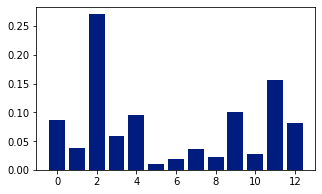

In [40]:
# define the model
model = DecisionTreeRegressor(random_state=123)
# fit the model
model.fit(x_1,y_1)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x_1 for x_1 in range(len(importance))], importance)
plt.show()

In [41]:
data2=data.drop(['fbs','restecg'], axis=1)

In [42]:
y_2=data2['target']
x_2=data2.drop(['target'], axis=1)

# K-fold CV

# Random forest

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import f1_score
from sklearn.model_selection import StratifiedKFold

In [44]:
kf=StratifiedKFold(n_splits=5,shuffle=True,random_state=123)
predrf=0
cv=[]
sumacc=[0]
sumf1=[0]
sumse=[0]
sumspe=[0]
sumauc=[0]
sumfpr1=[0]
sumtpr1=[0]
i=1
for itrain, itest in kf.split(x_2,y_2):
    print(i)
    x1train,x1test=x_2.loc[itrain],x_2.loc[itest]
    y1train,y1test=y_2.loc[itrain],y_2.loc[itest]
    rf=RandomForestClassifier(random_state=123)
    rffit=rf.fit(x1train,y1train)
    predrf=rf.predict(x1test)
    acc=accuracy_score(y1test,rf.predict(x1test))
    sumacc.append(acc)
    print(f"Accuracy:{round(acc,3)*100}%")
    f1=f1_score(y1test,rf.predict(x1test))
    sumf1.append(f1)
    print(f"F1 score: {round(f1,3)*100}%")
    cmrf=confusion_matrix(y1test,predrf)
    print("Confusion Matrix : \n",cmrf)
    sensitivity=cmrf[1,1]/(cmrf[1,1]+cmrf[1,0])
    sumse.append(sensitivity)
    print(f"Sensitivity score:{round(sensitivity,3)*100}%")
    specificity=cmrf[0,0]/(cmrf[0,0]+cmrf[0,1])
    sumspe.append(specificity)
    print(f"Specificity score:{round(specificity,3)*100}%")
    fpr,tpr,tresholds=roc_curve(y1test,predrf)
    aucreg=auc(fpr,tpr)
    sumfpr1.append(fpr)
    sumtpr1.append(tpr)
    sumauc.append(aucreg)
    print(f"AUC score:{round(aucreg,3)*100}%")

1
Accuracy:98.5%
F1 score: 98.6%
Confusion Matrix : 
 [[ 97   3]
 [  0 106]]
Sensitivity score:100.0%
Specificity score:97.0%
AUC score:98.5%
1
Accuracy:100.0%
F1 score: 100.0%
Confusion Matrix : 
 [[100   0]
 [  0 105]]
Sensitivity score:100.0%
Specificity score:100.0%
AUC score:100.0%
1
Accuracy:100.0%
F1 score: 100.0%
Confusion Matrix : 
 [[100   0]
 [  0 105]]
Sensitivity score:100.0%
Specificity score:100.0%
AUC score:100.0%
1
Accuracy:100.0%
F1 score: 100.0%
Confusion Matrix : 
 [[100   0]
 [  0 105]]
Sensitivity score:100.0%
Specificity score:100.0%
AUC score:100.0%
1
Accuracy:97.1%
F1 score: 97.1%
Confusion Matrix : 
 [[99  0]
 [ 6 99]]
Sensitivity score:94.3%
Specificity score:100.0%
AUC score:97.1%


Rata-rata accuracy score:99.1%
Rata-rata F1 score:99.1%
Rata-rata sensitivity:98.9%
Rata-rata specificity:99.4%
Rata-rata AUC:99.1%


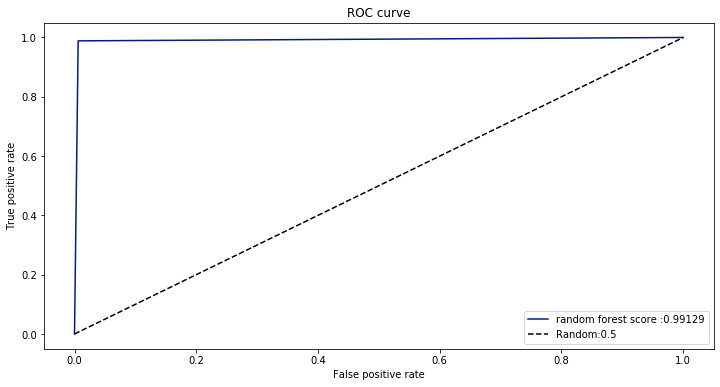

In [45]:
#Mean
print(f"Rata-rata accuracy score:{round((sum(sumacc)/5),3)*100}%")
print(f"Rata-rata F1 score:{round((sum(sumf1)/5),3)*100}%")
print(f"Rata-rata sensitivity:{round((sum(sumse)/5),3)*100}%")
print(f"Rata-rata specificity:{round((sum(sumspe)/5),3)*100}%")
print(f"Rata-rata AUC:{round((sum(sumauc)/5),3)*100}%")

plt.figure(figsize=(12,6),linewidth=1)
plt.plot((sum(sumfpr1)/5),(sum(sumtpr1)/5),label="random forest score :"+ str(round((sum(sumauc)/5),5)))
plt.plot([0,1],[0,1],'k--',label="Random:0.5")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("ROC curve")
plt.legend(loc="best")
plt.show()

# Gradient boosting

In [46]:
kf=StratifiedKFold(n_splits=5,shuffle=True,random_state=123)
predgb=0
cv=[]
sumacc=[0]
sumf1=[0]
sumse=[0]
sumspe=[0]
sumauc=[0]
sumfpr1=[0]
sumtpr1=[0]
i=1
for itrain, itest in kf.split(x_2,y_2):
    print(i)
    x1train,x1test=x_2.loc[itrain],x_2.loc[itest]
    y1train,y1test=y_2.loc[itrain],y_2.loc[itest]
    gb=GradientBoostingClassifier(random_state=123)
    fitgb=gb.fit(x1train,y1train)
    predgb=gb.predict(x1test)
    acc=accuracy_score(y1test,gb.predict(x1test))
    sumacc.append(acc)
    print(f"Accuracy:{round(acc,3)*100}%")
    f1=f1_score(y1test,gb.predict(x1test))
    sumf1.append(f1)
    print(f"F1 score: {round(f1,3)*100}%")
    cmgb=confusion_matrix(y1test,predgb)
    print("Confusion Matrix : \n",cmgb)
    sensitivity=cmgb[0,0]/(cmgb[0,0]+cmgb[0,1])
    sumse.append(sensitivity)
    print(f"Sensitivity score:{round(sensitivity,3)*100}%")
    specificity=cmgb[1,1]/(cmgb[1,0]+cmgb[1,1])
    sumspe.append(specificity)
    print(f"Specificity score:{round(specificity,3)*100}%")
    fpr,tpr,tresholds=roc_curve(y1test,predgb)
    aucreg=auc(fpr,tpr)
    sumfpr1.append(fpr)
    sumtpr1.append(tpr)
    sumauc.append(aucreg)
    print(f"AUC score:{round(aucreg,3)*100}%")

1
Accuracy:95.6%
F1 score: 95.8%
Confusion Matrix : 
 [[ 95   5]
 [  4 102]]
Sensitivity score:95.0%
Specificity score:96.2%
AUC score:95.6%
1
Accuracy:93.2%
F1 score: 93.30000000000001%
Confusion Matrix : 
 [[93  7]
 [ 7 98]]
Sensitivity score:93.0%
Specificity score:93.30000000000001%
AUC score:93.2%
1
Accuracy:99.5%
F1 score: 99.5%
Confusion Matrix : 
 [[100   0]
 [  1 104]]
Sensitivity score:100.0%
Specificity score:99.0%
AUC score:99.5%
1
Accuracy:98.0%
F1 score: 98.1%
Confusion Matrix : 
 [[ 99   1]
 [  3 102]]
Sensitivity score:99.0%
Specificity score:97.1%
AUC score:98.1%
1
Accuracy:96.6%
F1 score: 96.7%
Confusion Matrix : 
 [[ 96   3]
 [  4 101]]
Sensitivity score:97.0%
Specificity score:96.2%
AUC score:96.6%


Rata-rata accuracy score:96.6%
Rata-rata F1 score:96.7%
Rata-rata sensitivity:96.8%
Rata-rata specificity:96.39999999999999%
Rata-rata AUC:96.6%


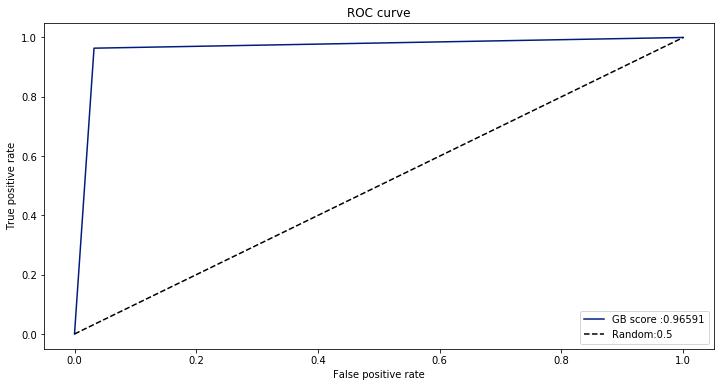

In [47]:
print(f"Rata-rata accuracy score:{round((sum(sumacc)/5),3)*100}%")
print(f"Rata-rata F1 score:{round((sum(sumf1)/5),3)*100}%")
print(f"Rata-rata sensitivity:{round((sum(sumse)/5),3)*100}%")
print(f"Rata-rata specificity:{round((sum(sumspe)/5),3)*100}%")
print(f"Rata-rata AUC:{round((sum(sumauc)/5),3)*100}%")

plt.figure(figsize=(12,6),linewidth=1)
plt.plot((sum(sumfpr1)/5),(sum(sumtpr1)/5),label="GB score :"+ str(round((sum(sumauc)/5),5)))
plt.plot([0,1],[0,1],'k--',label="Random:0.5")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("ROC curve")
plt.legend(loc="best")
plt.show()

# Naive Bayes

In [48]:
kf=StratifiedKFold(n_splits=5,shuffle=True,random_state=123)
prednb=0
cv=[]
sumacc=[0]
sumf1=[0]
sumse=[0]
sumspe=[0]
sumauc=[0]
sumfpr1=[0]
sumtpr1=[0]
i=1
for itrain, itest in kf.split(x_2,y_2):
    print(i)
    x1train,x1test=x_2.loc[itrain],x_2.loc[itest]
    y1train,y1test=y_2.loc[itrain],y_2.loc[itest]
    nb=GaussianNB()
    nbfit=nb.fit(x1train,y1train)
    prednb=nb.predict(x1test)
    acc=accuracy_score(y1test,nb.predict(x1test))
    sumacc.append(acc)
    print(f"Accuracy:{round(acc,3)*100}%")
    f1=f1_score(y1test,nb.predict(x1test))
    sumf1.append(f1)
    print(f"F1 score: {round(f1,3)*100}%")
    cmnb=confusion_matrix(y1test,prednb)
    print("Confusion Matrix : \n",cmnb)
    sensitivity=cmnb[0,0]/(cmnb[0,0]+cmnb[0,1])
    sumse.append(sensitivity)
    print(f"Sensitivity score:{round(sensitivity,3)*100}%")
    specificity=cmnb[1,1]/(cmnb[1,0]+cmnb[1,1])
    sumspe.append(specificity)
    print(f"Specificity score:{round(specificity,3)*100}%")
    fpr,tpr,tresholds=roc_curve(y1test,prednb)
    aucreg=auc(fpr,tpr)
    sumfpr1.append(fpr)
    sumtpr1.append(tpr)
    sumauc.append(aucreg)
    print(f"AUC score:{round(aucreg,3)*100}%")

1
Accuracy:81.10000000000001%
F1 score: 82.39999999999999%
Confusion Matrix : 
 [[76 24]
 [15 91]]
Sensitivity score:76.0%
Specificity score:85.8%
AUC score:80.9%
1
Accuracy:84.89999999999999%
F1 score: 85.2%
Confusion Matrix : 
 [[85 15]
 [16 89]]
Sensitivity score:85.0%
Specificity score:84.8%
AUC score:84.89999999999999%
1
Accuracy:82.39999999999999%
F1 score: 83.5%
Confusion Matrix : 
 [[78 22]
 [14 91]]
Sensitivity score:78.0%
Specificity score:86.7%
AUC score:82.3%
1
Accuracy:84.89999999999999%
F1 score: 85.3%
Confusion Matrix : 
 [[84 16]
 [15 90]]
Sensitivity score:84.0%
Specificity score:85.7%
AUC score:84.89999999999999%
1
Accuracy:80.9%
F1 score: 82.39999999999999%
Confusion Matrix : 
 [[74 25]
 [14 91]]
Sensitivity score:74.7%
Specificity score:86.7%
AUC score:80.7%


Rata-rata accuracy score:82.8%
Rata-rata F1 score:83.7%
Rata-rata sensitivity:79.5%
Rata-rata specificity:85.9%
Rata-rata AUC:82.69999999999999%


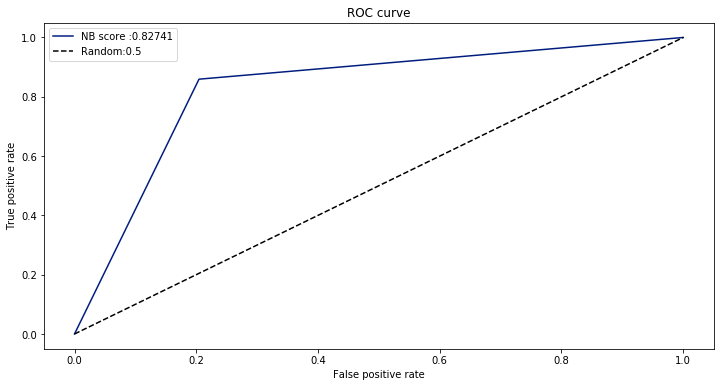

In [49]:
#Mean
print(f"Rata-rata accuracy score:{round((sum(sumacc)/5),3)*100}%")
print(f"Rata-rata F1 score:{round((sum(sumf1)/5),3)*100}%")
print(f"Rata-rata sensitivity:{round((sum(sumse)/5),3)*100}%")
print(f"Rata-rata specificity:{round((sum(sumspe)/5),3)*100}%")
print(f"Rata-rata AUC:{round((sum(sumauc)/5),3)*100}%")

plt.figure(figsize=(12,6),linewidth=1)
plt.plot((sum(sumfpr1)/5),(sum(sumtpr1)/5),label="NB score :"+ str(round((sum(sumauc)/5),5)))
plt.plot([0,1],[0,1],'k--',label="Random:0.5")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("ROC curve")
plt.legend(loc="best")
plt.show()

# Logistic regression

In [50]:
kf=StratifiedKFold(n_splits=5,shuffle=True,random_state=123)
predlog=0
cv=[]
sumacc=[0]
sumf1=[0]
sumse=[0]
sumspe=[0]
sumauc=[0]
sumfpr1=[0]
sumtpr1=[0]
i=1
for itrain, itest in kf.split(x_2,y_2):
    print(i)
    x1train,x1test=x_2.loc[itrain],x_2.loc[itest]
    y1train,y1test=y_2.loc[itrain],y_2.loc[itest]
    logr=LogisticRegression(C=0.01,solver='liblinear')
    reg_log=logr.fit(x1train,y1train)
    predlog=logr.predict(x1test)
    acc=accuracy_score(y1test,logr.predict(x1test))
    sumacc.append(acc)
    print(f"Accuracy:{round(acc,3)*100}%")
    f1=f1_score(y1test,logr.predict(x1test))
    sumf1.append(f1)
    print(f"F1 score: {round(f1,3)*100}%")
    cmlog=confusion_matrix(y1test,predlog)
    print("Confusion Matrix : \n",cmlog)
    sensitivity=cmlog[0,0]/(cmlog[0,0]+cmlog[0,1])
    sumse.append(sensitivity)
    print(f"Sensitivity score:{round(sensitivity,3)*100}%")
    specificity=cmlog[1,1]/(cmlog[1,0]+cmlog[1,1])
    sumspe.append(specificity)
    print(f"Specificity score:{round(specificity,3)*100}%")
    fpr,tpr,tresholds=roc_curve(y1test,predlog)
    aucreg=auc(fpr,tpr)
    sumfpr1.append(fpr)
    sumtpr1.append(tpr)
    sumauc.append(aucreg)
    print(f"AUC score:{round(aucreg,3)*100}%")

1
Accuracy:79.60000000000001%
F1 score: 81.69999999999999%
Confusion Matrix : 
 [[70 30]
 [12 94]]
Sensitivity score:70.0%
Specificity score:88.7%
AUC score:79.3%
1
Accuracy:78.5%
F1 score: 79.4%
Confusion Matrix : 
 [[76 24]
 [20 85]]
Sensitivity score:76.0%
Specificity score:81.0%
AUC score:78.5%
1
Accuracy:84.89999999999999%
F1 score: 86.3%
Confusion Matrix : 
 [[76 24]
 [ 7 98]]
Sensitivity score:76.0%
Specificity score:93.30000000000001%
AUC score:84.7%
1
Accuracy:84.39999999999999%
F1 score: 85.2%
Confusion Matrix : 
 [[81 19]
 [13 92]]
Sensitivity score:81.0%
Specificity score:87.6%
AUC score:84.3%
1
Accuracy:82.8%
F1 score: 84.3%
Confusion Matrix : 
 [[75 24]
 [11 94]]
Sensitivity score:75.8%
Specificity score:89.5%
AUC score:82.6%


Rata-rata accuracy score:82.1%
Rata-rata F1 score:83.39999999999999%
Rata-rata sensitivity:75.8%
Rata-rata specificity:88.0%
Rata-rata AUC:81.89999999999999%


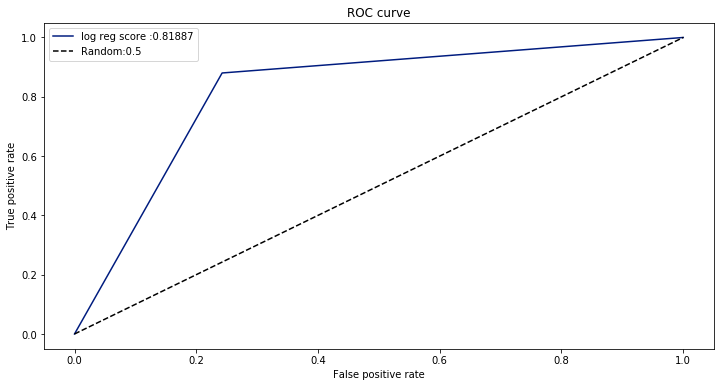

In [51]:
#Mean
print(f"Rata-rata accuracy score:{round((sum(sumacc)/5),3)*100}%")
print(f"Rata-rata F1 score:{round((sum(sumf1)/5),3)*100}%")
print(f"Rata-rata sensitivity:{round((sum(sumse)/5),3)*100}%")
print(f"Rata-rata specificity:{round((sum(sumspe)/5),3)*100}%")
print(f"Rata-rata AUC:{round((sum(sumauc)/5),3)*100}%")

plt.figure(figsize=(12,6),linewidth=1)
plt.plot((sum(sumfpr1)/5),(sum(sumtpr1)/5),label="log reg score :"+ str(round((sum(sumauc)/5),5)))
plt.plot([0,1],[0,1],'k--',label="Random:0.5")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("ROC curve")
plt.legend(loc="best")
plt.show()

# KNN

In [52]:
kf=StratifiedKFold(n_splits=5,shuffle=True,random_state=123)
predknn=0
cv=[]
sumacc=[0]
sumf1=[0]
sumse=[0]
sumspe=[0]
sumauc=[0]
sumfpr1=[0]
sumtpr1=[0]
i=1
for itrain, itest in kf.split(x_2,y_2):
    print(i)
    x1train,x1test=x_2.loc[itrain],x_2.loc[itest]
    y1train,y1test=y_2.loc[itrain],y_2.loc[itest]
    knn=KNeighborsClassifier(n_neighbors=1)
    knnfit=knn.fit(x1train,y1train)
    predknn=knn.predict(x1test)
    acc=accuracy_score(y1test,knn.predict(x1test))
    sumacc.append(acc)
    print(f"Accuracy:{round(acc,3)*100}%")
    f1=f1_score(y1test,knn.predict(x1test))
    sumf1.append(f1)
    print(f"F1 score: {round(f1,3)*100}%")
    cmknn=confusion_matrix(y1test,predknn)
    print("Confusion Matrix : \n",cmknn)
    sensitivity=cmknn[0,0]/(cmknn[0,0]+cmknn[0,1])
    sumse.append(sensitivity)
    print(f"Sensitivity score:{round(sensitivity,3)*100}%")
    specificity=cmknn[1,1]/(cmknn[1,0]+cmknn[1,1])
    sumspe.append(specificity)
    print(f"Specificity score:{round(specificity,3)*100}%")
    fpr,tpr,tresholds=roc_curve(y1test,predknn)
    aucreg=auc(fpr,tpr)
    sumfpr1.append(fpr)
    sumtpr1.append(tpr)
    sumauc.append(aucreg)
    print(f"AUC score:{round(aucreg,3)*100}%")

1
Accuracy:100.0%
F1 score: 100.0%
Confusion Matrix : 
 [[100   0]
 [  0 106]]
Sensitivity score:100.0%
Specificity score:100.0%
AUC score:100.0%
1
Accuracy:100.0%
F1 score: 100.0%
Confusion Matrix : 
 [[100   0]
 [  0 105]]
Sensitivity score:100.0%
Specificity score:100.0%
AUC score:100.0%
1
Accuracy:98.5%
F1 score: 98.6%
Confusion Matrix : 
 [[ 97   3]
 [  0 105]]
Sensitivity score:97.0%
Specificity score:100.0%
AUC score:98.5%
1
Accuracy:100.0%
F1 score: 100.0%
Confusion Matrix : 
 [[100   0]
 [  0 105]]
Sensitivity score:100.0%
Specificity score:100.0%
AUC score:100.0%
1
Accuracy:98.5%
F1 score: 98.6%
Confusion Matrix : 
 [[ 99   0]
 [  3 102]]
Sensitivity score:100.0%
Specificity score:97.1%
AUC score:98.6%


Rata-rata accuracy score:99.4%
Rata-rata F1 score:99.4%
Rata-rata sensitivity:99.4%
Rata-rata specificity:99.4%
Rata-rata AUC:99.4%


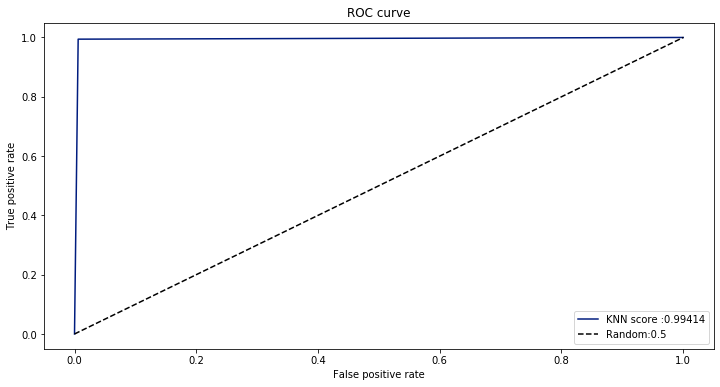

In [53]:
#Mean
print(f"Rata-rata accuracy score:{round((sum(sumacc)/5),3)*100}%")
print(f"Rata-rata F1 score:{round((sum(sumf1)/5),3)*100}%")
print(f"Rata-rata sensitivity:{round((sum(sumse)/5),3)*100}%")
print(f"Rata-rata specificity:{round((sum(sumspe)/5),3)*100}%")
print(f"Rata-rata AUC:{round((sum(sumauc)/5),3)*100}%")

plt.figure(figsize=(12,6),linewidth=1)
plt.plot((sum(sumfpr1)/5),(sum(sumtpr1)/5),label="KNN score :"+ str(round((sum(sumauc)/5),5)))
plt.plot([0,1],[0,1],'k--',label="Random:0.5")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("ROC curve")
plt.legend(loc="best")
plt.show()

# repeated holdout

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
for i in range(0,10):
    x_train,x_test, y_train, y_test = train_test_split(x_2, y_2, test_size = 0.3)

# random forest

In [56]:
model = RandomForestClassifier(random_state=123)
model.fit(x_train, y_train)
y_predict = model.predict(x_test)
y_pred_quant0 = model.predict_proba(x_test)[:, 1]

In [57]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       158
           1       0.99      1.00      0.99       150

    accuracy                           0.99       308
   macro avg       0.99      0.99      0.99       308
weighted avg       0.99      0.99      0.99       308



In [58]:
# evaluating the model
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

Training Accuracy : 0.99860529986053
Testing Accuracy : 0.9935064935064936


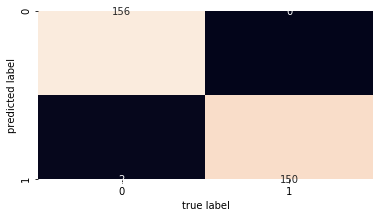

In [59]:
cm7 = confusion_matrix(y_test,y_predict)
plt.rcParams['figure.figsize'] = (6, 5)
sns.heatmap(cm7.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [60]:
total=sum(sum(cm7))

sensitivity = cm7[1,1]/(cm7[1,1]+cm7[1,0])
print('Sensitivity : ', sensitivity )

specificity = cm7[0,0]/(cm7[0,0]+cm7[0,1])
print('Specificity : ', specificity)

Sensitivity :  1.0
Specificity :  0.9873417721518988


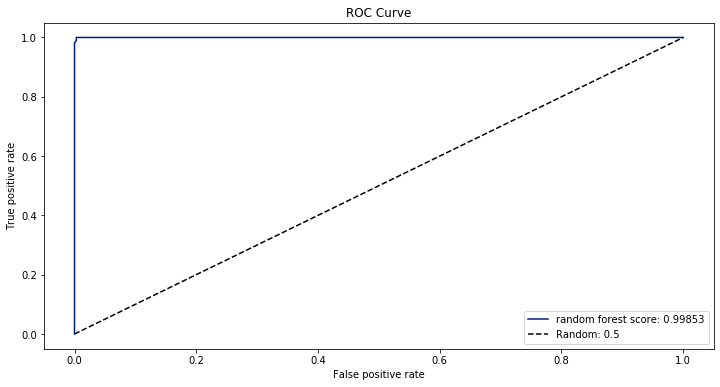

In [61]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
def get_auc_scores(y_2, method,method2):
    auc_score = roc_auc_score(y_2, method); 
    fpr_df, tpr_df, _ = roc_curve(y_2, method2); 
    return (auc_score, fpr_df, tpr_df)
auc, fpr, tpr = get_auc_scores(y_train, model.predict(x_train),model.predict_proba(x_train)[:,1])
plt.figure(figsize = (12,6), linewidth= 1)
plt.plot(fpr, tpr, label = 'random forest score: ' + str(round(auc, 5)))
plt.plot([0,1], [0,1], 'k--', label = 'Random: 0.5')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.legend(loc='best')
#plt.savefig('roc_results_ratios.png')
plt.show()

In [62]:
from sklearn.metrics import auc
auc = auc(fpr, tpr)
print("AUC Score :", auc)

AUC Score : 0.9999571036376116


# Gradient boosting

In [63]:
model1 = GradientBoostingClassifier(random_state=123)
model1.fit(x_train, y_train)
y_predict1 = model1.predict(x_test)
y_predict1_quant = model1.predict_proba(x_test)[:, 1]
print("Training Accuracy :", model1.score(x_train, y_train))
print("Testing Accuracy :", model1.score(x_test, y_test))

Training Accuracy : 0.9902370990237099
Testing Accuracy : 0.9577922077922078


In [64]:
print(classification_report(y_test,y_predict1))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96       158
           1       0.94      0.98      0.96       150

    accuracy                           0.96       308
   macro avg       0.96      0.96      0.96       308
weighted avg       0.96      0.96      0.96       308



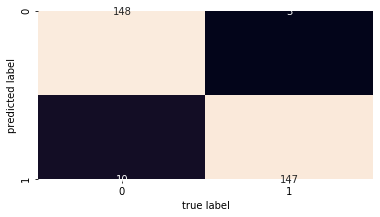

In [65]:
cm1 = confusion_matrix(y_test,y_predict1)
plt.rcParams['figure.figsize'] = (6, 5)
sns.heatmap(cm1.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [66]:
total=sum(sum(cm1))

sensitivity = cm1[1,1]/(cm1[1,1]+cm1[1,0])
print('Sensitivity : ', sensitivity )

specificity = cm1[0,0]/(cm7[0,0]+cm1[0,1])
print('Specificity : ', specificity)

Sensitivity :  0.98
Specificity :  0.891566265060241


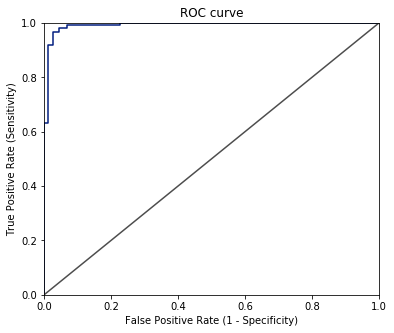

In [67]:
from sklearn.metrics import roc_curve

fpr1, tpr1, thresholds1 = roc_curve(y_test, y_predict1_quant)

fig, ax = plt.subplots()
ax.plot(fpr1, tpr1)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="-", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.rcParams['figure.figsize'] = (15, 5)
plt.title('ROC curve', fontweight = 30)
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

In [68]:
# let's check the auc score

from sklearn.metrics import auc
auc1 = auc(fpr1, tpr1)
print("AUC Score :", auc1)

AUC Score : 0.9921518987341772


# decision tree tidak dijalankan

# Decision tree

In [68]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [19]:
clf = tree.DecisionTreeClassifier(random_state=123,criterion = "entropy")
clf.fit(x_2, y_2)
clf.score(x_2, y_2)

1.0

In [13]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [15]:
pip install pydotplus

  Created wheel for pydotplus: filename=pydotplus-2.0.2-cp37-none-any.whl size=24573 sha256=de3a6d4e22b514b60b51142659495548cf6726a74a79df067cdf05b3e735922e
  Stored in directory: C:\Users\User-pc\AppData\Local\pip\Cache\wheels\35\7b\ab\66fb7b2ac1f6df87475b09dc48e707b6e0de80a6d8444e3628
Successfully built pydotplus
Note: you may need to restart the kernel to use updated packages.


In [21]:
import graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

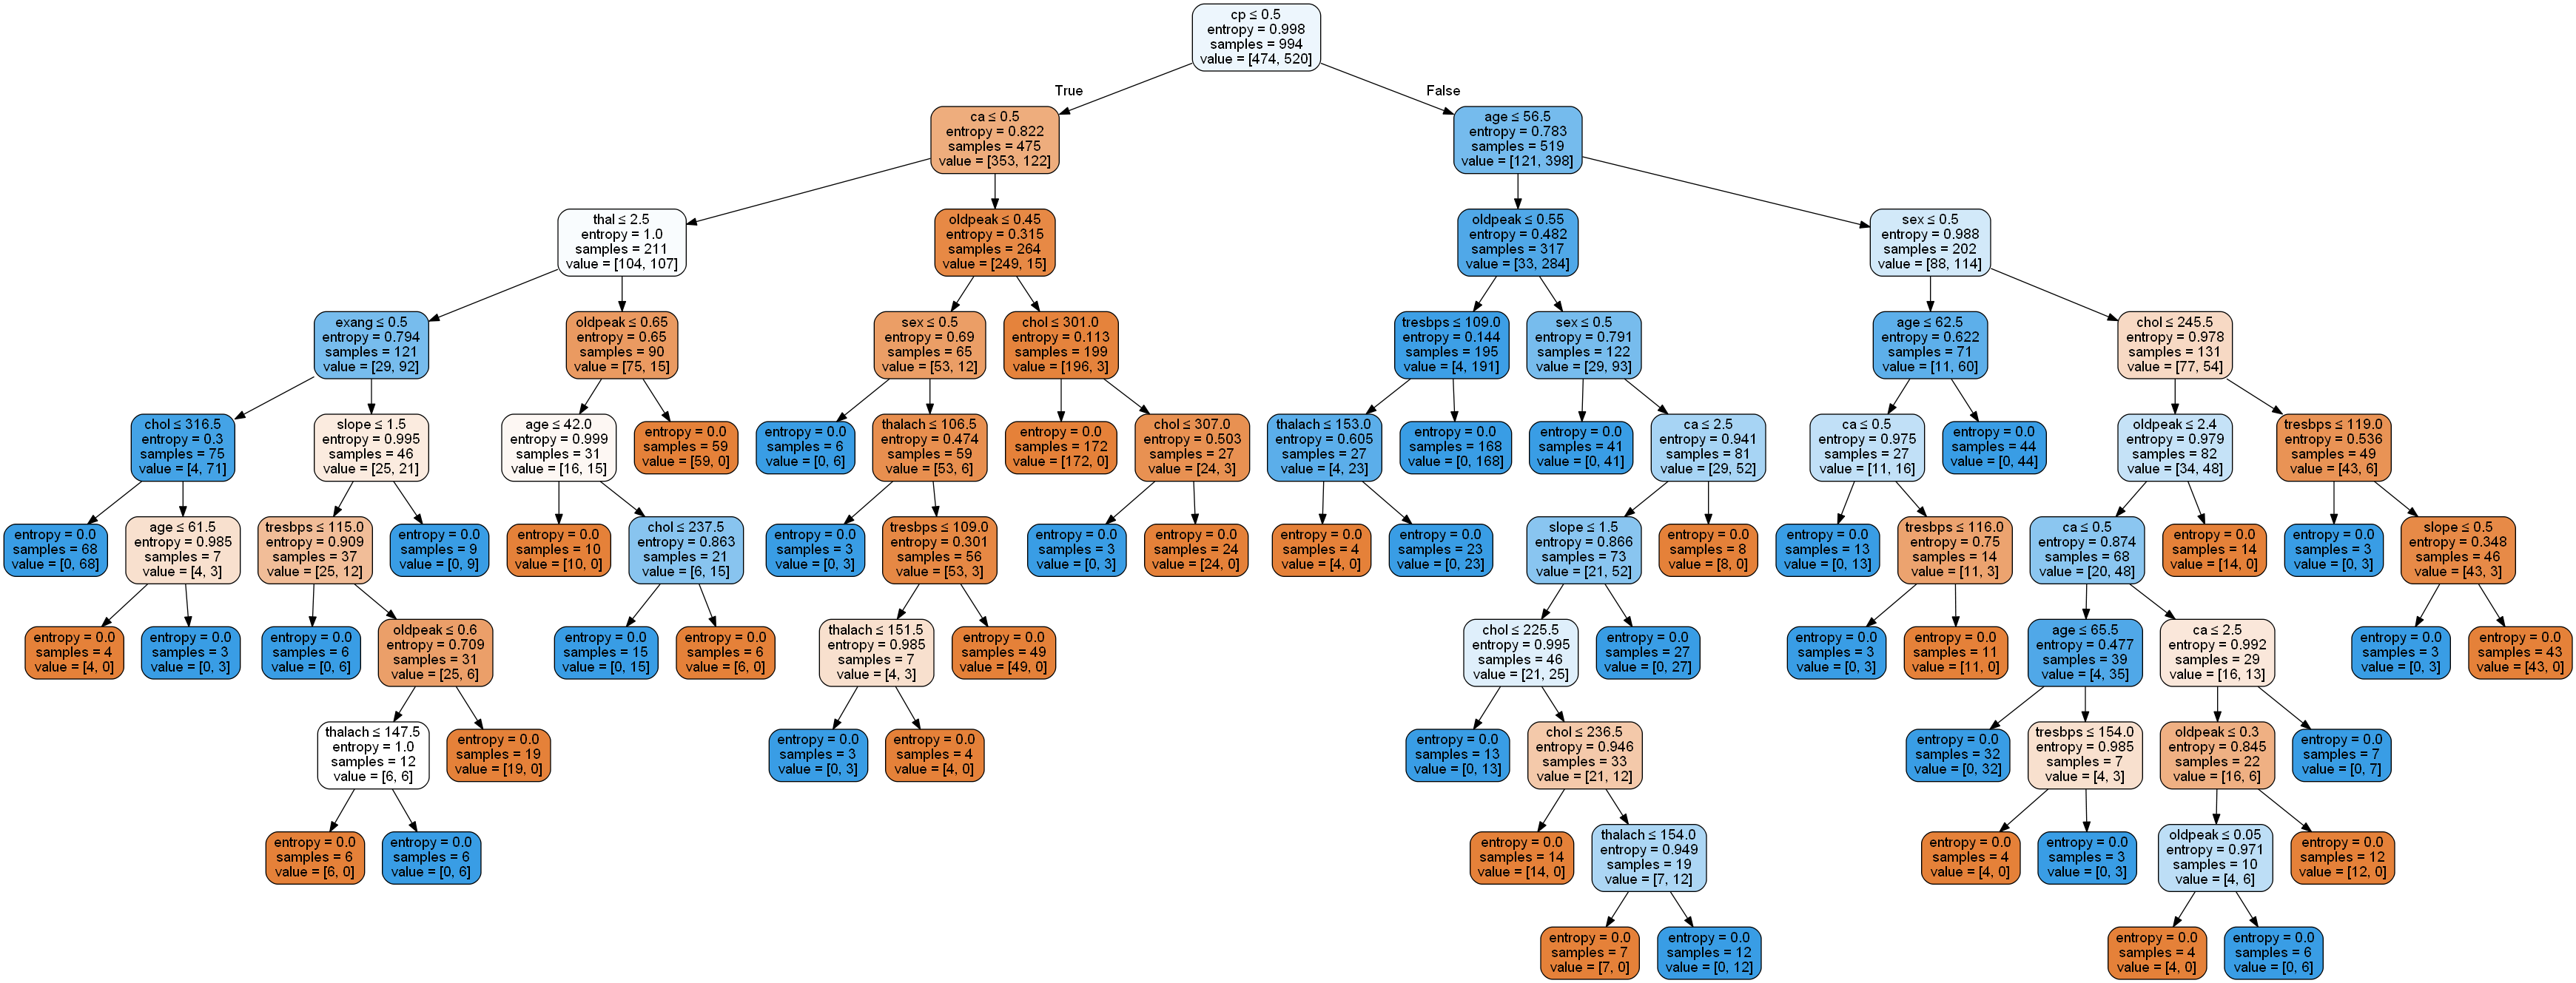

In [23]:
data_feature_names = ['age','sex','cp','tresbps','chol','thalach','exang','oldpeak','slope','ca','thal']
dot_data=StringIO()
export_graphviz(clf,out_file=dot_data,feature_names=data_feature_names,
               filled=True, rounded=True,
               special_characters=True)

graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [69]:
dtc=DecisionTreeClassifier()
model2=dtc.fit(x_train,y_train)
prediction2=model2.predict(x_test)
cm2= confusion_matrix(y_test,prediction2)
cm2

array([[137,   0],
       [  3, 159]], dtype=int64)

In [70]:
print(classification_report(y_test, prediction2))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       137
           1       1.00      0.98      0.99       162

    accuracy                           0.99       299
   macro avg       0.99      0.99      0.99       299
weighted avg       0.99      0.99      0.99       299



In [25]:
y_predict = clf.predict(x_2)
conf_matrix = confusion_matrix(y_2, y_predict)
species = data2['target'].unique()
conf_matrix_df = pd.DataFrame(data=conf_matrix, columns=species, index=species)
conf_matrix_df

,0,1
0,474,0
1,0,520


In [26]:
akurasi_test = accuracy_score(y_2, y_predict)
presisi_test = precision_score(y_2, y_predict)
print(akurasi_test)
print(presisi_test)

1.0
1.0


# Logistic regression

In [69]:
logmodel = LogisticRegression(random_state=123)
logmodel.fit(x_train,y_train)
predictions = logmodel.predict(x_test)
predictions_quant = logmodel.predict_proba(x_test)[:,1]

In [70]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.92      0.82      0.87       158
           1       0.83      0.93      0.87       150

    accuracy                           0.87       308
   macro avg       0.87      0.87      0.87       308
weighted avg       0.88      0.87      0.87       308



In [71]:
print("Training Accuracy :", logmodel.score(x_train, y_train))
print("Testing Accuracy :", logmodel.score(x_test, y_test))

Training Accuracy : 0.8340306834030683
Testing Accuracy : 0.8701298701298701


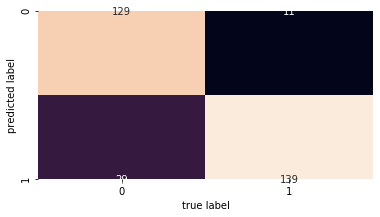

In [72]:
cm2 = confusion_matrix(y_test,predictions)
plt.rcParams['figure.figsize'] = (6, 5)
sns.heatmap(cm2.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [73]:
total=sum(sum(cm2))

sensitivity = cm2[1,1]/(cm2[1,1]+cm2[1,0])
print('Sensitivity : ', sensitivity )

specificity = cm2[0,0]/(cm2[0,0]+cm2[0,1])
print('Specificity : ', specificity)

Sensitivity :  0.9266666666666666
Specificity :  0.8164556962025317


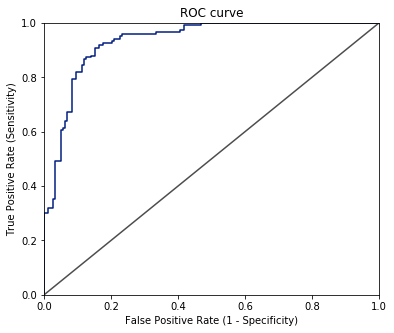

In [74]:
from sklearn.metrics import roc_curve

fpr2, tpr2, thresholds2 = roc_curve(y_test, predictions_quant)

fig, ax = plt.subplots()
ax.plot(fpr2, tpr2)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="-", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.rcParams['figure.figsize'] = (15, 5)
plt.title('ROC curve', fontweight = 30)
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

In [75]:
# let's check the auc score

from sklearn.metrics import auc
auc2 = auc(fpr2, tpr2)
print("AUC Score :", auc2)

AUC Score : 0.9335443037974682


# KNN

In [76]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)
pred = knn.predict(x_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99       158
           1       0.97      1.00      0.99       150

    accuracy                           0.99       308
   macro avg       0.99      0.99      0.99       308
weighted avg       0.99      0.99      0.99       308



In [77]:
print(confusion_matrix(y_test,pred))

[[154   4]
 [  0 150]]


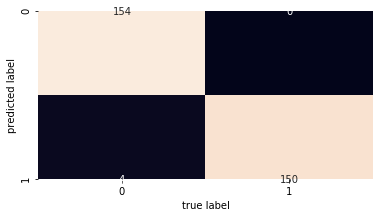

In [78]:
cmknn = confusion_matrix(y_test,pred)
plt.rcParams['figure.figsize'] = (6, 5)
sns.heatmap(cmknn.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [79]:
total=sum(sum(cmknn))

sensitivity = cmknn[1,1]/(cmknn[1,1]+cmknn[1,0])
print('Sensitivity : ', sensitivity )

specificity = cmknn[0,0]/(cmknn[0,0]+cmknn[0,1])
print('Specificity : ', specificity)

Sensitivity :  1.0
Specificity :  0.9746835443037974


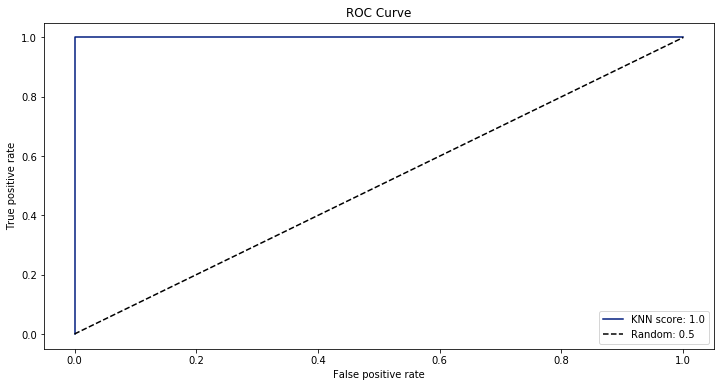

In [80]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
def get_auc_scores(y_2, method,method2):
    auc_score = roc_auc_score(y_2, method); 
    fpr_df, tpr_df, _ = roc_curve(y_2, method2); 
    return (auc_score, fpr_df, tpr_df)
auc, fpr, tpr = get_auc_scores(y_train, knn.predict(x_train),knn.predict_proba(x_train)[:,1])
plt.figure(figsize = (12,6), linewidth= 1)
plt.plot(fpr, tpr, label = 'KNN score: ' + str(round(auc, 5)))
plt.plot([0,1], [0,1], 'k--', label = 'Random: 0.5')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.legend(loc='best')
#plt.savefig('roc_results_ratios.png')
plt.show()

In [81]:
from sklearn.metrics import auc
auc = auc(fpr, tpr)
print("AUC Score :", auc)

AUC Score : 1.0


# Naive Bayes

In [82]:
NB = GaussianNB()
NB.fit(x_train, y_train)
prediction5 = NB.predict(x_test)
prediction5_quant = NB.predict_proba(x_test)[:,1]

In [83]:
print(classification_report(y_test,prediction5))

              precision    recall  f1-score   support

           0       0.87      0.79      0.83       158
           1       0.80      0.88      0.84       150

    accuracy                           0.83       308
   macro avg       0.84      0.84      0.83       308
weighted avg       0.84      0.83      0.83       308



In [84]:
print("Training Accuracy :", NB.score(x_train, y_train))
print("Testing Accuracy :", NB.score(x_test, y_test))

Training Accuracy : 0.8158995815899581
Testing Accuracy : 0.8344155844155844


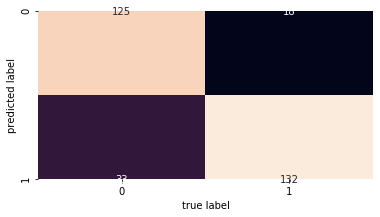

In [85]:
cm5= confusion_matrix(y_test, prediction5)
plt.rcParams['figure.figsize'] = (6, 5)
sns.heatmap(cm5.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [86]:
total=sum(sum(cm5))

sensitivity = cm5[1,1]/(cm5[1,1]+cm5[1,0])
print('Sensitivity : ', sensitivity )

specificity = cm5[0,0]/(cm5[0,0]+cm5[0,1])
print('Specificity : ', specificity)

Sensitivity :  0.88
Specificity :  0.7911392405063291


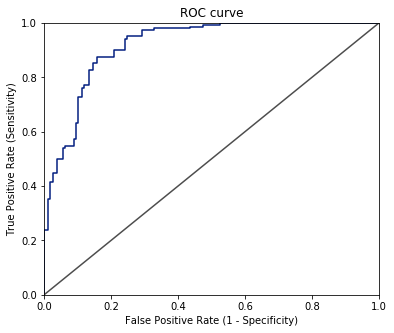

In [87]:
from sklearn.metrics import roc_curve

fpr5, tpr5, thresholds5 = roc_curve(y_test, prediction5_quant)

fig, ax = plt.subplots()
ax.plot(fpr5, tpr5)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="-", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.rcParams['figure.figsize'] = (10, 5)
plt.title('ROC curve', fontweight = 30)
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

In [88]:
# let's check the auc score

from sklearn.metrics import auc
auc5 = auc(fpr5, tpr5)
print("AUC Score :", auc5)# let's check the auc score

AUC Score : 0.9187341772151899
